In [1]:
#Load in required libraries, if you have not installed these libraries, you can use the install.packages command 
library(data.table)
library(plyr)
library(tidyverse)
library(forecast)
library(lmtest)
library(ggplot2)
library(scales)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.1     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ dplyr::between()   masks data.table::between()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename()
✖ dplyr::summarise() masks plyr::summarise()
✖ dplyr::summarize() masks plyr::summarize()
✖ purrr::transpose() masks data.table::transpose()
Loading required package: zoo

Atta

In [2]:
getwd()

[1] "/Users/Ryan/Desktop/datareach/disease prediction"

In [3]:
#read in the cleaned data file
data<-read_csv('Paludisme.csv')

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  .default = col_integer(),
  Province = col_character(),
  Region = col_character(),
  `W 145` = col_character(),
  `W 146` = col_character(),
  `W 147` = col_character(),
  `W 148` = col_character(),
  `W 149` = col_character(),
  `W 150` = col_character(),
  `W 151` = col_character(),
  `W 152` = col_character(),
  `W 153` = col_character(),
  `W 154` = col_character(),
  `W 155` = col_character(),
  `W 156` = col_character(),
  `W 157` = col_character()
)
See spec(...) for full column specifications.


In [4]:
# Further cleaning for data
# remove NA at the end
data <- data[,-c(148:160)]
# set 56th and 71st row to zero due to NA
data[56,] <- seq(0,0,length.out=ncol(data))
data[71,] <- seq(0,0,length.out=ncol(data))

In [5]:
# Convert the numerical data to numerical type
cols = c(4:147);    
data[,cols] = apply(data[,cols], 2, function(x) as.numeric(as.character(x)))

In [6]:
data

X1,Province,Region,W 1,W 2,W 3,W 4,W 5,W 6,W 7,⋯,W 135,W 136,W 137,W 138,W 139,W 140,W 141,W 142,W 143,W 144
1,ADAMAOUA,BANKIM,19,47,55,6,59,64,84,⋯,12,17,22,34,51,29,26,25,36,35
2,ADAMAOUA,BANYO,92,73,38,36,104,32,43,⋯,40,35,50,45,38,23,60,46,59,63
3,ADAMAOUA,DJOHONG,NA,0,97,23,83,85,24,⋯,85,25,142,84,32,24,71,36,49,NA
4,ADAMAOUA,MEIGANGA,24,32,32,12,NA,25,15,⋯,189,144,133,145,122,132,214,312,170,190
5,ADAMAOUA,NGAOUNDAL,NA,110,86,108,84,78,40,⋯,228,206,118,191,168,103,80,144,112,240
6,ADAMAOUA,NGAOUNDERE RURAL,379,377,367,318,346,251,282,⋯,258,209,221,256,279,301,375,310,320,368
7,ADAMAOUA,NGAOUNDERE URBAIN,509,533,613,552,524,443,473,⋯,375,379,363,343,350,231,252,340,382,478
8,ADAMAOUA,TIBATI,NA,82,58,59,76,82,50,⋯,45,90,NA,104,125,68,77,44,114,109
9,ADAMAOUA,TIGNERE,NA,86,168,153,76,131,157,⋯,101,175,151,166,146,182,157,112,158,196
10,CENTRE,AKONOLINGA,9,16,13,16,10,7,18,⋯,49,54,59,51,61,57,47,41,10,17


In [7]:
## replace NA with row means
#data_noNA <- cbind(data)
#for ( r in 1:nrow(data) ){
#    data_noNA[r, is.na(data[r,])] <- rowMeans(data[r,cols], na.rm = 1)
#}

In [8]:
# replace NA with mean of predecessor and follower
N <- nrow(data)
data_noNA <- as.tibble(cbind(data))
for ( r in 1:N ){
    for ( c in cols ){
        if (c==147) c
        if (is.na(data[r,c])){
            # find the prev
            has_prev <- FALSE
            for (i in c:4){
                if (!is.na(data[r,i])){
                    has_prev <- TRUE
                    prev <- data[r,i]
                    break
                }
            } 
            # find post
            has_post <- FALSE
            for (j in c:147){
                if (!is.na(data[r,j])){
                    has_post <- TRUE
                    post <- data[r,j]
                    break
                }
            }
            data_noNA[r,c] <- 0
            if (has_prev){
                data_noNA[r,c] <- data_noNA[r,c]+prev
            }
            if (has_post){
                data_noNA[r,c] <- (data_noNA[r,c]+post)/(1+has_prev)
            }
        } 
    }
}

In [9]:
r = 3
data_noNA[r,]
data[r,]

X1,Province,Region,W 1,W 2,W 3,W 4,W 5,W 6,W 7,⋯,W 135,W 136,W 137,W 138,W 139,W 140,W 141,W 142,W 143,W 144
3,ADAMAOUA,DJOHONG,0,0,97,23,83,85,24,⋯,85,25,142,84,32,24,71,36,49,49


X1,Province,Region,W 1,W 2,W 3,W 4,W 5,W 6,W 7,⋯,W 135,W 136,W 137,W 138,W 139,W 140,W 141,W 142,W 143,W 144
3,ADAMAOUA,DJOHONG,NA,0,97,23,83,85,24,⋯,85,25,142,84,32,24,71,36,49,NA


In [10]:
any(is.na(data_noNA))
data_noNA

[1] FALSE

X1,Province,Region,W 1,W 2,W 3,W 4,W 5,W 6,W 7,⋯,W 135,W 136,W 137,W 138,W 139,W 140,W 141,W 142,W 143,W 144
1,ADAMAOUA,BANKIM,19,47,55,6,59.0,64,84,⋯,12,17,22.0,34,51,29,26,25,36,35
2,ADAMAOUA,BANYO,92,73,38,36,104.0,32,43,⋯,40,35,50.0,45,38,23,60,46,59,63
3,ADAMAOUA,DJOHONG,0,0,97,23,83.0,85,24,⋯,85,25,142.0,84,32,24,71,36,49,49
4,ADAMAOUA,MEIGANGA,24,32,32,12,18.5,25,15,⋯,189,144,133.0,145,122,132,214,312,170,190
5,ADAMAOUA,NGAOUNDAL,110,110,86,108,84.0,78,40,⋯,228,206,118.0,191,168,103,80,144,112,240
6,ADAMAOUA,NGAOUNDERE RURAL,379,377,367,318,346.0,251,282,⋯,258,209,221.0,256,279,301,375,310,320,368
7,ADAMAOUA,NGAOUNDERE URBAIN,509,533,613,552,524.0,443,473,⋯,375,379,363.0,343,350,231,252,340,382,478
8,ADAMAOUA,TIBATI,82,82,58,59,76.0,82,50,⋯,45,90,97.0,104,125,68,77,44,114,109
9,ADAMAOUA,TIGNERE,86,86,168,153,76.0,131,157,⋯,101,175,151.0,166,146,182,157,112,158,196
10,CENTRE,AKONOLINGA,9,16,13,16,10.0,7,18,⋯,49,54,59.0,51,61,57,47,41,10,17


In [11]:
five_week_sum <- function(CrossCorr){
score <- 0
for (lag in -5:5){
    corr <- CrossCorr[lag][[1]]
    score <- score + 5*corr
}
return(score)
}

In [12]:
five_week_weighted_sum <- function(CrossCorr){
score <- 0
for (lag in -5:5){
    corr <- CrossCorr[lag][[1]]
    score <- score + 10.0/(abs(lag)+1)*corr
}
return(score)
}

In [13]:
two_week_weighted_sum <- function(CrossCorr){
score <- 0
for (lag in -2:2){
    corr <- CrossCorr[lag][[1]]
    score <- score + 15.0/(abs(lag)+1)*corr
}
return(score)
}

, , 1

         [,1]
[1,] 17.64584

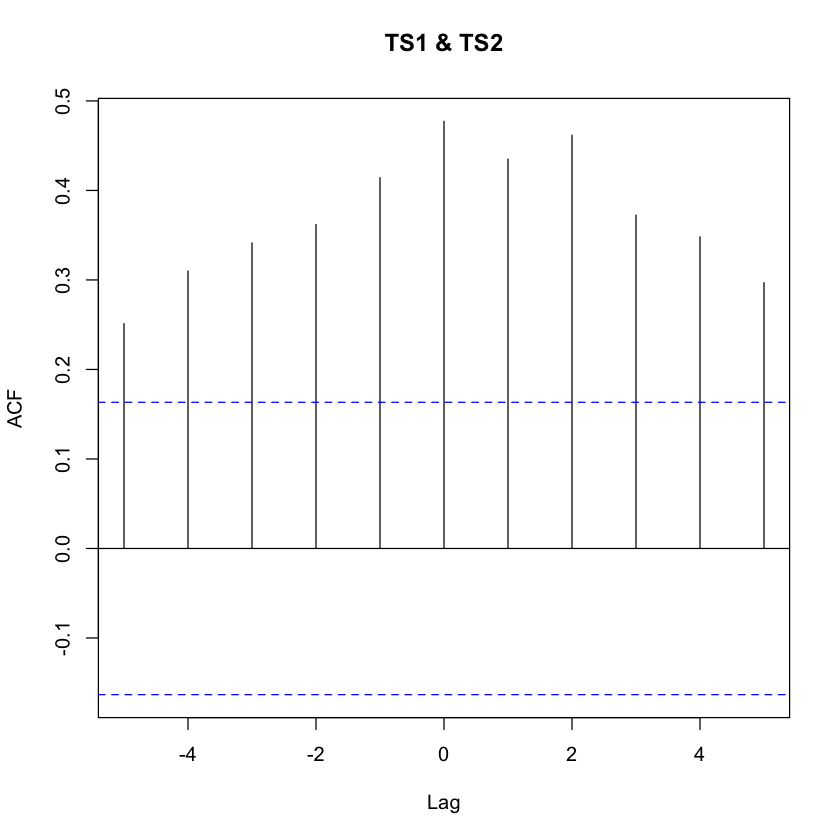

In [14]:
# example
TS1<-ts(as.numeric(data_noNA[25, 4:ncol(data_noNA)])) 
TS2<-ts(as.numeric(data_noNA[30, 4:ncol(data_noNA)]))
CrossCorr<-ccf(TS1, TS2, lag = 5, pl = TRUE)
two_week_weighted_sum(CrossCorr)

In [15]:
score_mat <- matrix(nrow=N, ncol=N)
# the (i,j) entry of score mat correspond to ccf(i,j)
for (i in 1:N){
    for (j in 1:N){
        if (j > i){
        TS1<-as.ts(as.numeric(data_noNA[i, 4:ncol(data_noNA)])) 
        TS2<-as.ts(as.numeric(data_noNA[j, 4:ncol(data_noNA)]))
        CrossCorr<-ccf(TS1, TS2, lag = 5, pl = FALSE)
        score_mat[i,j] <- two_week_weighted_sum(CrossCorr)
        }
    }
}

In [18]:
score_mat

NA,8.897968,7.289838,1.547821,6.617204,11.77063,9.272008,8.141791,8.979578,-0.09598433,⋯,-6.8592647,0.2519501,-5.7078038,-4.7068354,2.337566,-0.83122722,-2.1599635,-0.6187199,-3.3518530,3.3145557
NA,NA,9.672078,6.190298,14.825802,18.39452,14.598572,16.412713,17.121409,7.18856333,⋯,-2.0063021,-7.5198560,5.7962037,-1.4828538,9.035165,6.47147813,2.3146602,4.5118213,-7.0524614,0.2988779
NA,NA,NA,-1.259480,2.864484,15.63002,15.927959,12.421667,17.763520,2.60269594,⋯,4.2500524,3.0125102,2.8464850,-5.7969482,4.723628,1.73611622,6.8965405,2.4955352,2.4826451,-0.7811107
NA,NA,NA,NA,19.148087,12.05241,-2.237729,12.781969,5.755710,19.95896198,⋯,7.5889564,4.5990875,13.0443006,12.7511516,-2.714414,6.18032674,4.3544366,9.5531715,7.0971148,2.5184208
NA,NA,NA,NA,NA,18.67422,8.317691,13.231904,10.604373,18.58532529,⋯,6.4996712,-5.7157372,8.8143293,10.5192376,3.836818,10.14483204,4.5735757,5.8183840,1.0071920,-1.3681246
NA,NA,NA,NA,NA,NA,23.485607,18.646662,22.121826,14.07422022,⋯,6.1678162,-2.1649802,8.1441989,2.3381328,9.132954,10.67645984,6.8346842,6.0424658,3.0685790,-3.1413166
NA,NA,NA,NA,NA,NA,NA,10.275959,18.025281,-0.27974280,⋯,2.9250199,-3.2592125,-0.3330063,-4.9951596,8.255250,7.21943073,0.4715963,-0.5194877,-3.6802929,-5.3481820
NA,NA,NA,NA,NA,NA,NA,NA,16.767062,13.62283941,⋯,4.5233583,0.8850504,10.4045069,0.9812794,9.217635,3.79629163,8.1768349,7.9083248,2.0180195,-0.4572102
NA,NA,NA,NA,NA,NA,NA,NA,NA,6.90050125,⋯,4.5077044,0.3298874,7.8032326,-4.3723774,8.971211,6.02793211,6.1177331,6.3535509,-0.8508997,-0.5002175
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,11.7277359,0.0567592,15.2249357,12.7792313,2.474832,9.12659435,14.1953501,11.2656681,10.3277093,-0.8069084
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0.6279773,5.9776677,7.6381683,-4.3490881,7.559722,1.47164325,6.0460008,8.4173043,2.2658589,3.2187355


In [16]:
process_scores<- function(score_mat){
    # summary stats of scores
    scores = c(score_mat)
    print(summary(scores))
    print ( c("Mean: ",mean(scores,na.rm = TRUE)) )
    print( c("SD: ",sd(scores,na.rm = TRUE)) )
    hist(scores,
         breaks=50, freq=FALSE,
         main="Histogram of Correlation Scores",
         xlab="Correlation Score",
         col="steelblue")
    # heatmap of score matrix
    melted_score = melt(score_mat, na.rm = TRUE) 
    colnames(melted_score) <- c("Region1", "Region2", "Score")
    ggplot(data=melted_score, aes(x=Region1, y=Region2, fill=Score)) +
    geom_tile(colour="white") +
    scale_fill_gradient2(low = "#a6611a", high = "#018571", mid = "#f5f5f5", midpoint = 0)
}

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-23.752  -2.624   2.244   2.918   7.731  34.640   18330 
[1] "Mean: "           "2.91802900836282"
[1] "SD: "             "7.94646995464151"


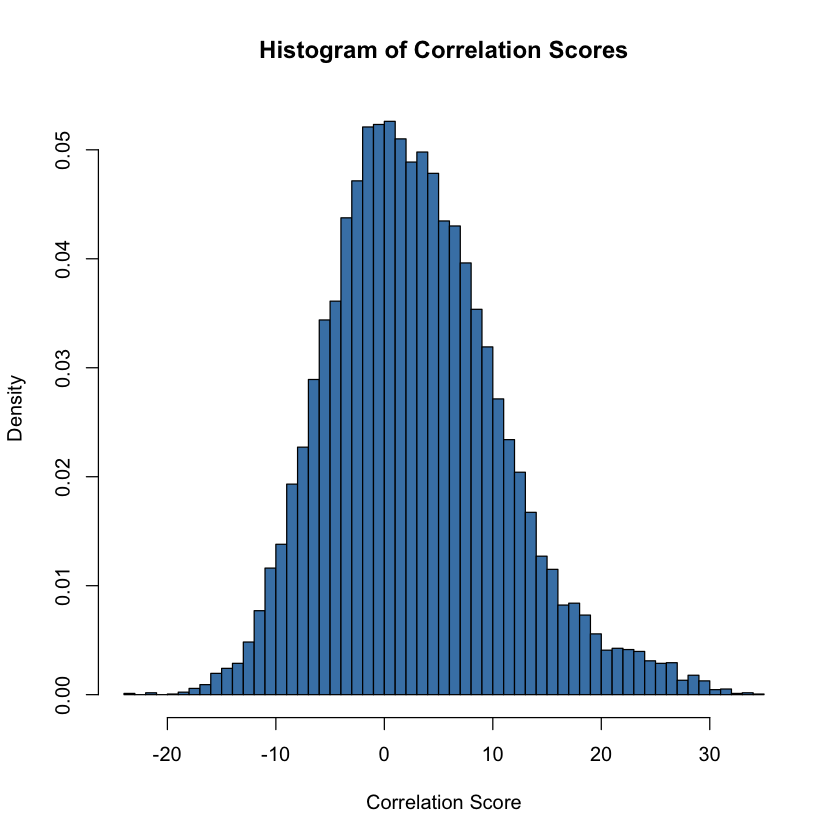

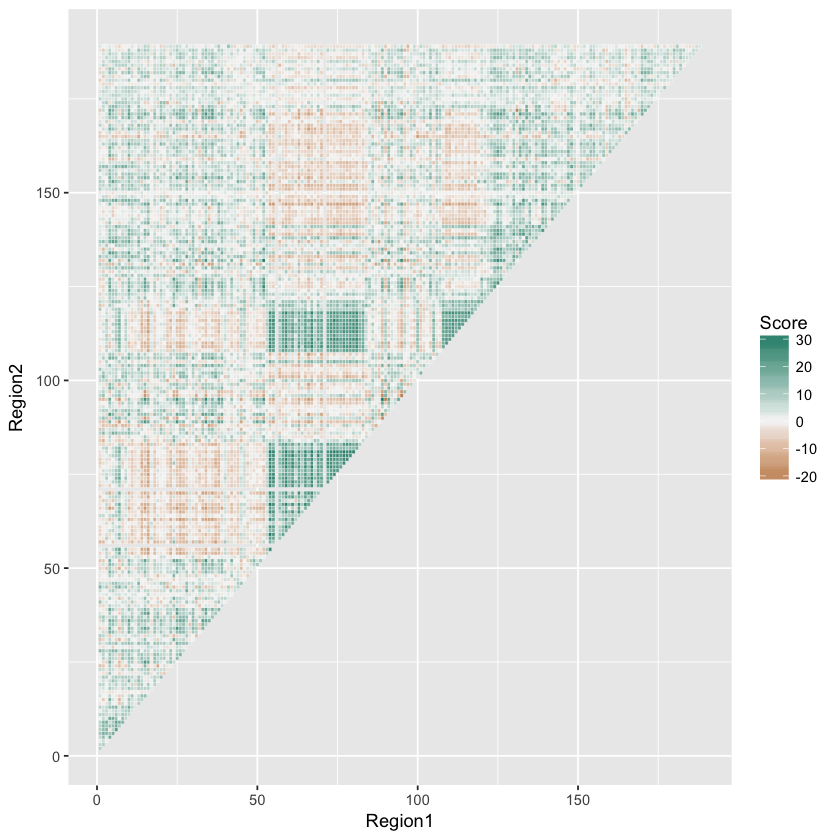

In [19]:
################
# ten-week sum #
################
process_scores(score_mat)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-30.730  -3.548   2.474   3.285   9.245  45.527   18330 
[1] "Mean: "           "3.28504342670618"
[1] "SD: "             "9.87622118312465"


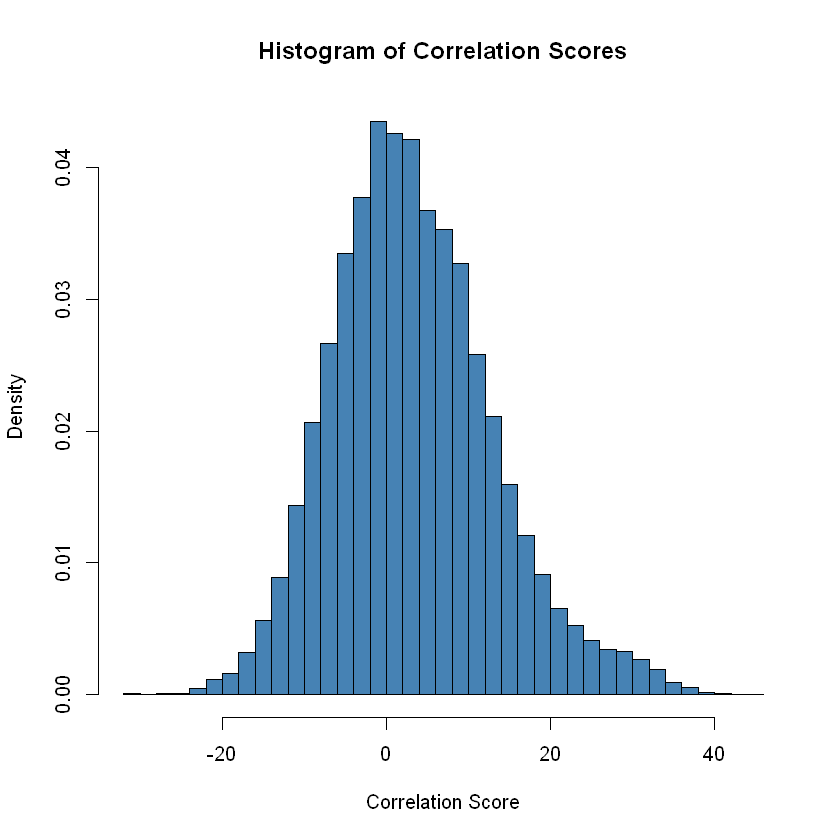

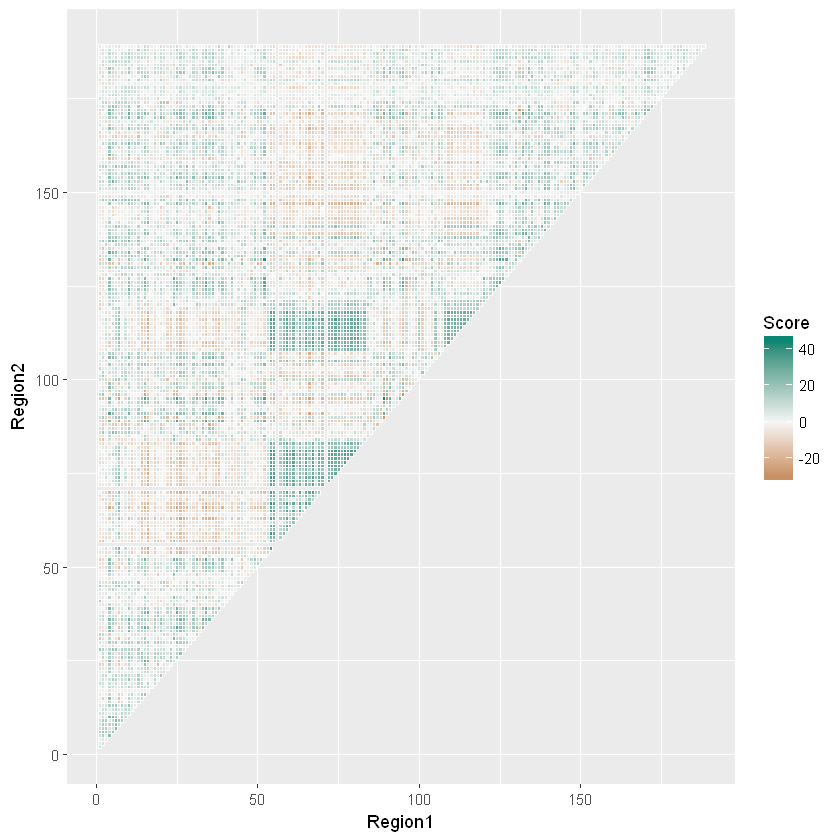

In [116]:
################
# ten-week sum #
################
process_scores(score_mat)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-23.752  -2.624   2.244   2.918   7.731  34.640   18330 
[1] "Mean: "           "2.91802900836282"
[1] "SD: "             "7.94646995464151"


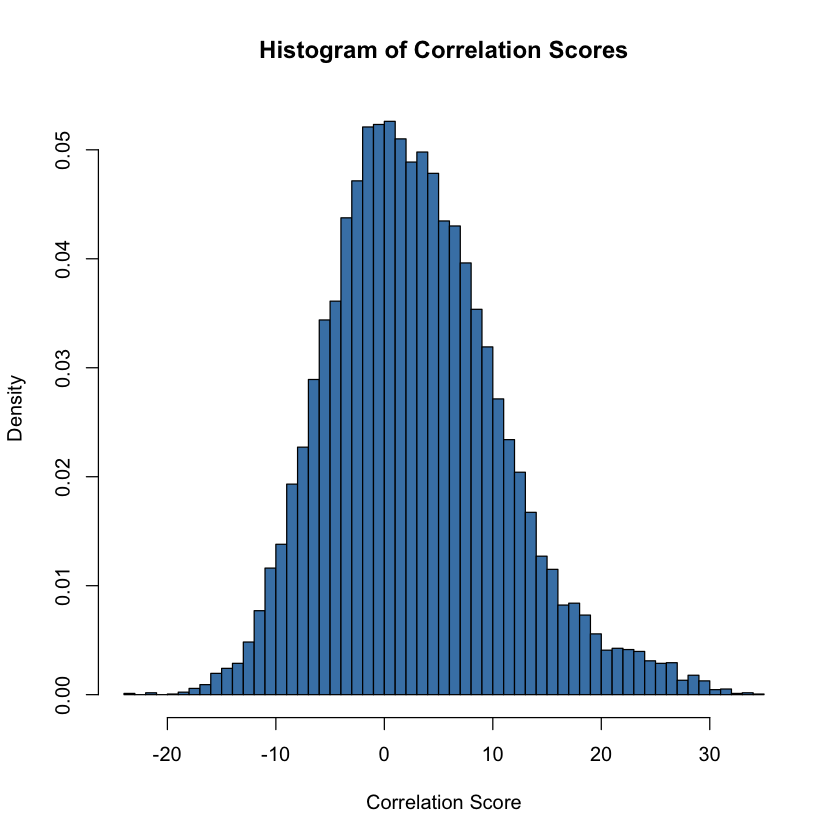

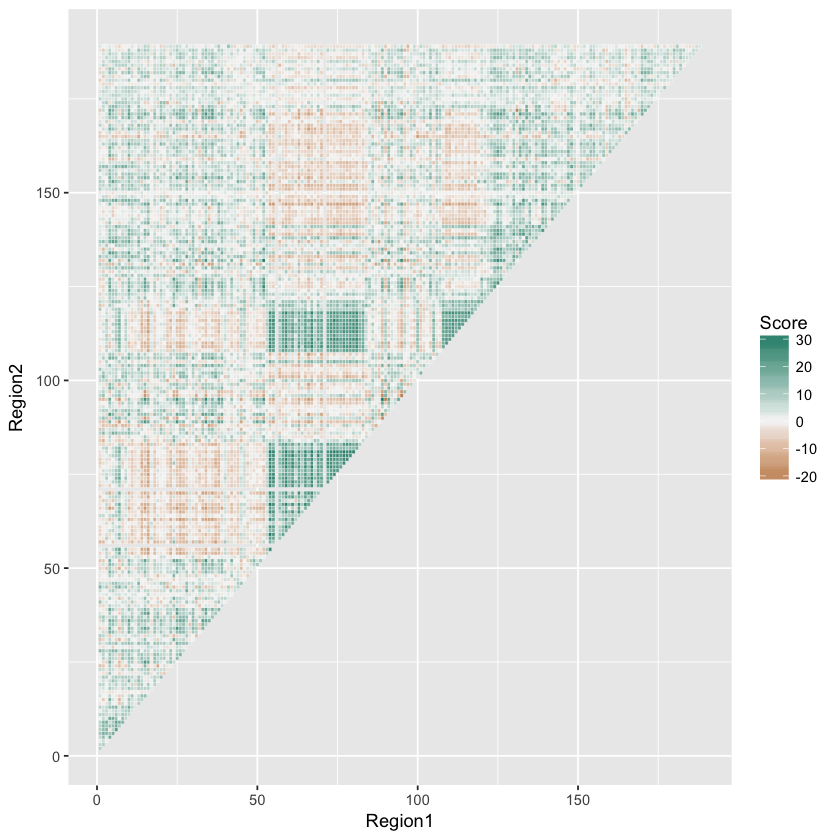

In [20]:
#########################
# ten-week weighted sum #
#########################
process_scores(score_mat)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-22.306  -2.541   1.949   2.584   7.007  33.012   18330 
[1] "Mean: "           "2.58401409749341"
[1] "SD: "             "7.34279325209932"


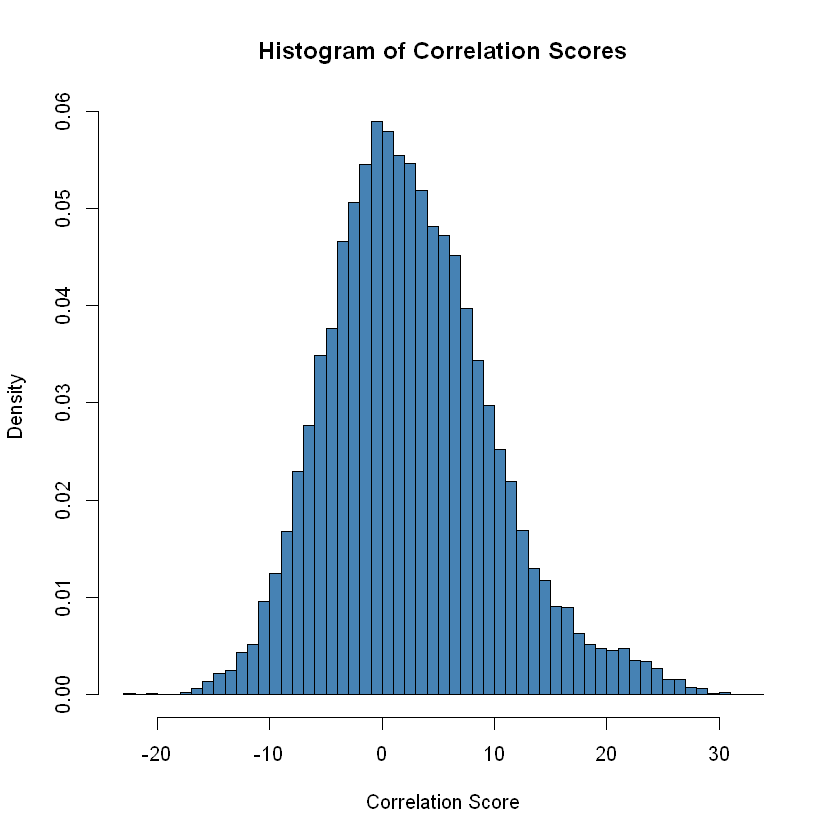

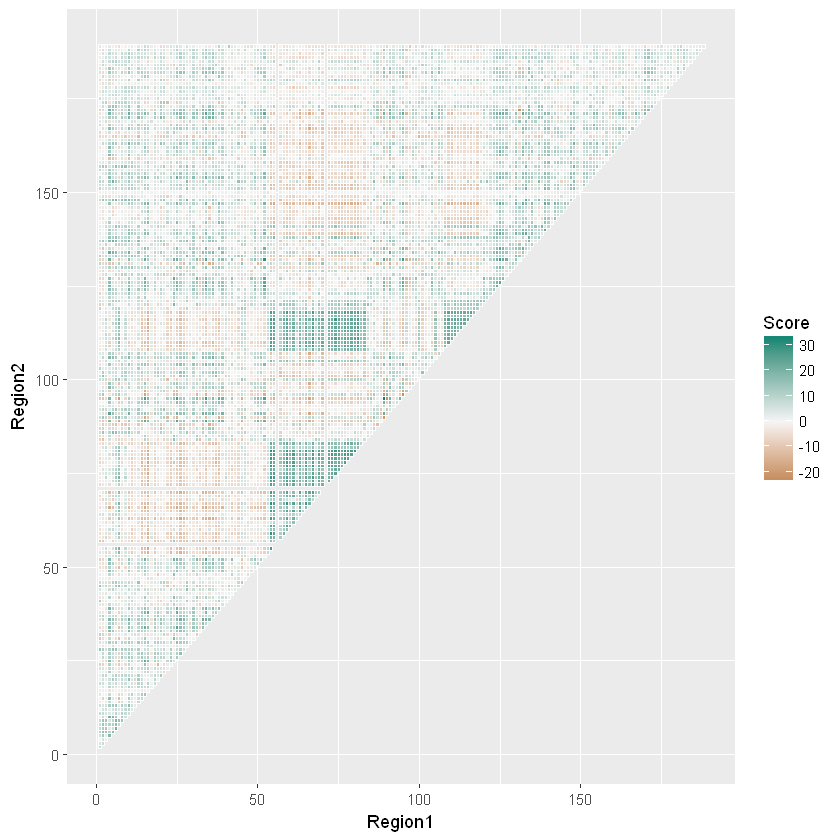

In [118]:
#########################
# ten-week weighted sum #
#########################
process_scores(score_mat)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-23.752  -2.624   2.244   2.918   7.731  34.640   18330 
[1] "Mean: "           "2.91802900836282"
[1] "SD: "             "7.94646995464151"


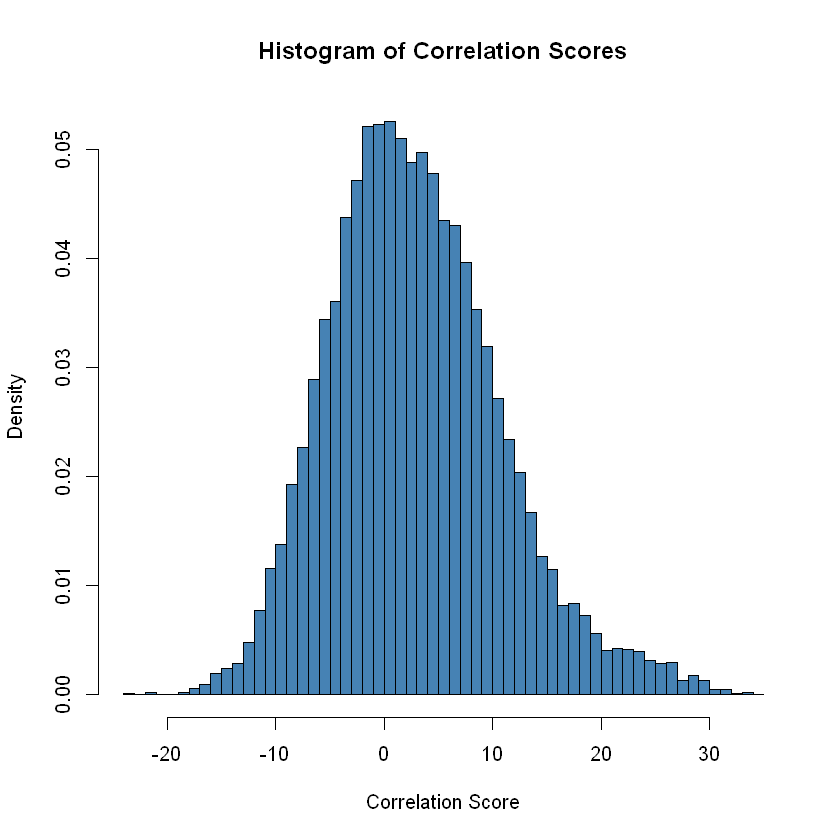

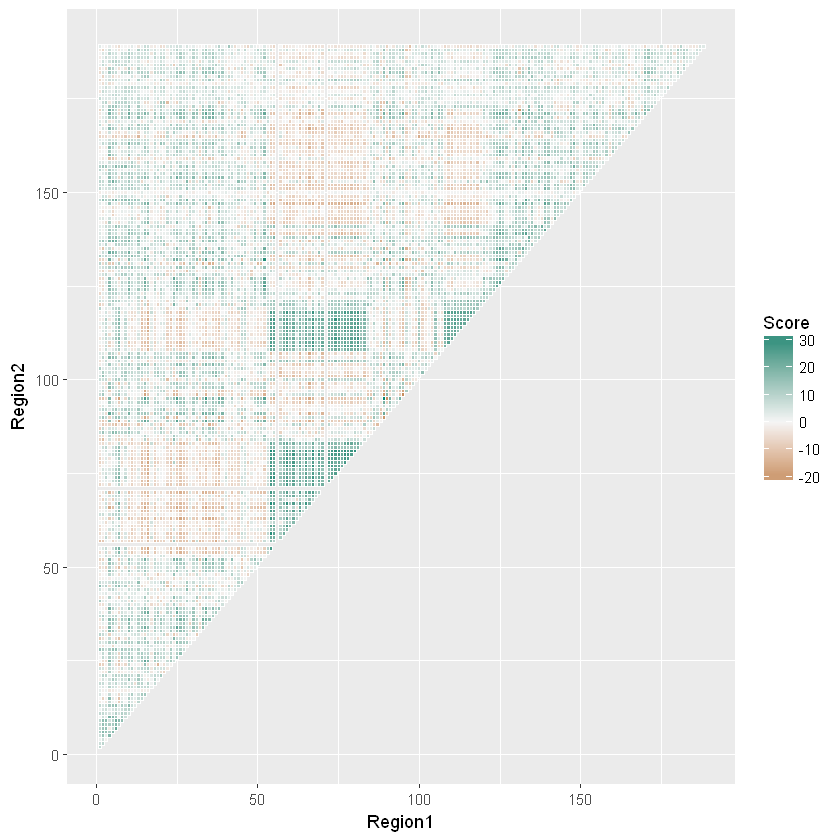

In [133]:
#########################
# two-week weighted sum #
#########################
process_scores(score_mat)